In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
our_color_palette = {"WT": "#F2C14E", # yellow
                     "W": "#F2C14E", # yellow
                     "IP": "#79ADDC", # blue
                     "I": "#79ADDC", # blue
                     "KO": "#B279A7", # purple
                     "K": "#B279A7", # purple
                    } 
treatments_list = ["W", "I", "K"]
passages_list = ["p1", "p2", "p3", "p5", "p10"]
replicates_list = ['a', 'b', 'c']

In [3]:
# define protein 

proteins = {'DCV' : {
    "2B": (1164, 1587),
}, 
            'CrPV': {
    "2B": (1279, 1692),
}
           }

In [4]:
# load diveristy 

fname = "all_snpgenie_site_results.csv"
df = pd.read_csv(fname)

In [5]:
# exclude parental 

df = df[df['passage']!='parental_p0']

In [7]:
df_pis_protein = pd.DataFrame() 

for virus in ['DCV', 'CrPV']:
    for sample in df['passage'].unique():
        proteins_virus = proteins[virus]
        for protein in proteins_virus.items():
            protein_id = protein[0]
            protein_start = protein[1][0]
            protein_end = protein[1][1]
            protein_length = protein_end - protein_start

            df_temp = df[df['virus']== virus]
            df_temp = df_temp[df_temp['passage']==sample]
            df_temp = df_temp[df_temp['site'].isin(list(range(protein_start,protein_end+1 )))]
            avg_pi = df_temp['pi'].sum()/protein_length

            mean_pis = {
                        'virus': [virus], 
                        'sample': sample, 
                        'protein': protein_id,
                        'avg_pi': avg_pi, 
                    }

            df_pis_protein = pd.concat([pd.DataFrame(mean_pis),df_pis_protein], ignore_index=True)

In [8]:
df_pis_protein['genotype'] = df_pis_protein['sample'].str.split("_").str[0]
df_pis_protein['rep'] = df_pis_protein['sample'].str.split("_").str[-1]
df_pis_protein['passage'] = df_pis_protein['sample'].str.split("_").str[1].str.split("p").str[-1].astype(int)

df_pis_protein.head()

,virus,sample,protein,avg_pi,genotype,rep,passage
0,CrPV,W_p10_c,2B,0.000372,W,c,10
1,CrPV,W_p5_c,2B,0.000195,W,c,5
2,CrPV,W_p5_b,2B,0.000227,W,b,5
3,CrPV,W_p5_a,2B,0.001347,W,a,5
4,CrPV,I_p3_c,2B,0.000168,I,c,3


In [9]:
df_pis_protein['genotype'].unique()

array(['W', 'I', 'K', 'parental'], dtype=object)

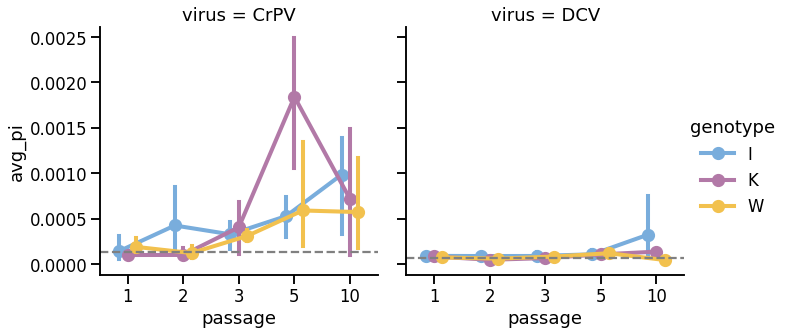

In [12]:
sns.set_context("talk") 


g = sns.catplot(df_pis_protein[df_pis_protein['genotype']!='parental'], 
                x='passage', 
                y='avg_pi',
                hue='genotype', 
                #row_order=['DCV'],
                col='virus', 
                dodge=0.3,
                palette=our_color_palette, 
                kind='point')

# Add a horizontal line to each plot
df_p0 = df_pis_protein[df_pis_protein['genotype']=='parental']
for ax in g.axes.flat:
    protein = ax.title.get_text().split("= ")[-1] 
    pi_p0 = df_p0[df_p0['virus']==protein]['avg_pi'].values[0]
    ax.axhline(y=pi_p0, color='gray', linestyle='--')

In [50]:
df_pi_summary = df_pis_protein[
    ['virus', 'avg_pi', 'genotype', 'passage', 'rep']
].groupby(by=['genotype', 'rep', 'virus']).mean().reset_index()

In [51]:
df_pi_summary

,genotype,rep,virus,avg_pi,passage
0,I,a,CrPV,0.000501,4.2
1,I,a,DCV,0.000229,4.2
2,I,b,CrPV,0.000371,4.2
3,I,b,DCV,0.000078,4.2
4,I,c,CrPV,0.000571,4.2
5,I,c,DCV,0.000110,4.2
6,K,a,CrPV,0.000597,4.2
7,K,a,DCV,0.000092,4.2
8,K,b,CrPV,0.000672,4.2
9,K,b,DCV,0.000087,4.2


/var/folders/dw/8dl4p6h53cgcmk6cf_09v5f40000gr/T/ipykernel_47754/3849278090.py:5: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.1}` instead.

  g = sns.catplot(df_pi_summary[df_pi_summary['genotype']!='parental'],


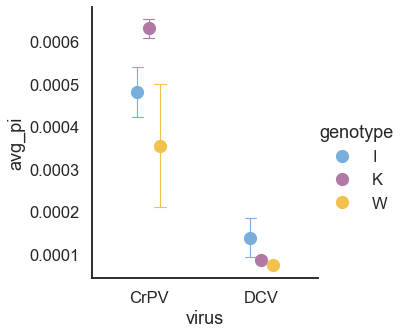

In [55]:
sns.set_context("talk") 
sns.set_style('white')


g = sns.catplot(df_pi_summary[df_pi_summary['genotype']!='parental'], 
                y='avg_pi',
                hue='genotype', 
                x='virus', 
                palette=our_color_palette, 
                errorbar="se",
                linestyle='',
                errwidth=1.1, 
                dodge=0.2,
                capsize=0.1,
                kind='point')


In [57]:
df_pi_summary = df_pi_summary[df_pi_summary['genotype']!='parental']

In [59]:
df_pi_summary['rep'] = df_pi_summary['virus']+df_pi_summary['genotype']+df_pi_summary['rep']

/var/folders/dw/8dl4p6h53cgcmk6cf_09v5f40000gr/T/ipykernel_47754/1974102335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pi_summary['rep'] = df_pi_summary['virus']+df_pi_summary['genotype']+df_pi_summary['rep']


In [83]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [84]:
%%R -i df_pi_summary 

df_pi_summary$pi_log = log(df_pi_summary$avg_pi)


# since normality in our data is not met, even with transformation
# we use the permutation-based ANOVA which does not require normality of residuals 

library(lmPerm)
model <- aovp(pi_log ~ virus * genotype, data = df_pi_summary)
summary(model)

[1] "Settings:  unique SS "
Component 1 :
                 Df R Sum Sq R Mean Sq Iter Pr(Prob)    
virus1            1  11.0878   11.0878 5000  < 2e-16 ***
genotype1         2   0.8426    0.4213  968  0.09607 .  
virus1:genotype1  2   0.3792    0.1896  608  0.24671    
Residuals        12   1.5917    0.1326                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



/Users/lfuhrmann/Library/Python/3.9/lib/python/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


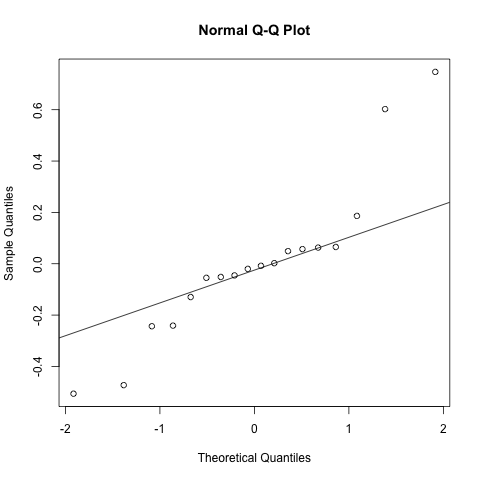

In [85]:
%%R 

# Basic Q-Q plot
qqnorm(residuals(model))
qqline(residuals(model))

In [79]:
%%R -i df_pi_summary 

df_pi_summary$pi_log = log(df_pi_summary$avg_pi)

library(rstatix)


# Assuming your data is in a dataframe called 'df'
model <- aov(pi_log ~ virus * genotype, data = df_pi_summary)
summary(model)


               Df Sum Sq Mean Sq F value   Pr(>F)    
virus           1 11.088  11.088  83.590 9.35e-07 ***
genotype        2  0.843   0.421   3.176   0.0782 .  
virus:genotype  2  0.379   0.190   1.429   0.2774    
Residuals      12  1.592   0.133                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


/Users/lfuhrmann/Library/Python/3.9/lib/python/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


In [80]:
%%R 

# Tukey's HSD test
TukeyHSD(model, which='virus')


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = pi_log ~ virus * genotype, data = df_pi_summary)

$virus
            diff       lwr       upr p adj
DCV-CrPV -1.5697 -1.943776 -1.195625 9e-07



In [81]:
%%R 
shapiro.test(residuals(model))



	Shapiro-Wilk normality test

data:  residuals(model)
W = 0.88819, p-value = 0.03594



In [82]:
%%R 
library(car)
leveneTest(avg_pi ~ virus * genotype, data = df_pi_summary)


Levene's Test for Homogeneity of Variance (center = median)
      Df F value Pr(>F)
group  5    1.02 0.4481
      12               
